In [1]:

import tifffile as tf
import zarr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy.spatial import KDTree
import numpy as np
import pandas as pd
import zarr
from scipy.spatial import KDTree
import tifffile as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import dask.array as da
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans
from ome_types import from_tiff
from tifffile import imwrite, tiffcomment





/Users/swarchol/mambaforge/envs/mattress/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
csv_df = pd.read_csv('/Users/swarchol/Research/bed/data/for_simon_with_umap_lean_new_columns.csv')

In [3]:
csv_df['cluster_2d'] = csv_df['cluster_2d'].astype('category')

# Get unique clusters
unique_clusters = csv_df['cluster_2d'].cat.categories

# Generate random colors for each cluster, converting numpy arrays to tuples
np.random.seed(42)  # For reproducibility
colors = {cluster: tuple(np.random.rand(3,)) for cluster in unique_clusters}

hex_colors = {cluster: '#%02x%02x%02x' % tuple((np.array(colors[cluster]) * 255).astype(int)) for cluster in unique_clusters}

In [4]:
for i in tqdm(range(len(csv_df))):
    csv_df.loc[i, 'color'] = hex_colors[csv_df.loc[i, 'cluster_2d']]

100%|██████████| 933253/933253 [00:57<00:00, 16349.58it/s]


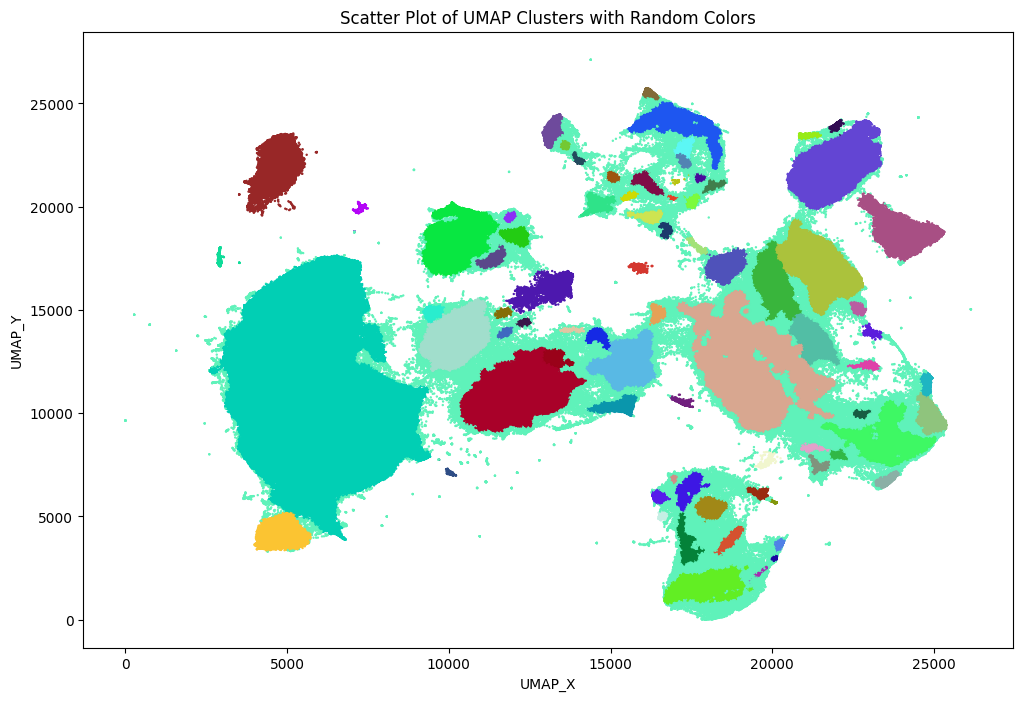

In [5]:
import matplotlib.pyplot as plt

# Set the figure size to be twice as large
plt.figure(figsize=(12, 8))  # Example: Original size was (6, 4), so now it's twice as large

# Plot the scatter plot using the assigned colors, with smaller points
plt.scatter(csv_df['UMAP_X'], csv_df['UMAP_Y'], c=csv_df['color'], s=0.5)  # Set point size to 0.5

# Label the axes and title
plt.xlabel('UMAP_X')
plt.ylabel('UMAP_Y')
plt.title('Scatter Plot of UMAP Clusters with Random Colors')

# Save the figure as a PNG file
plt.savefig('umap_clusters.png', format='png', dpi=300)  # High resolution PNG

# Show the plot
plt.show()

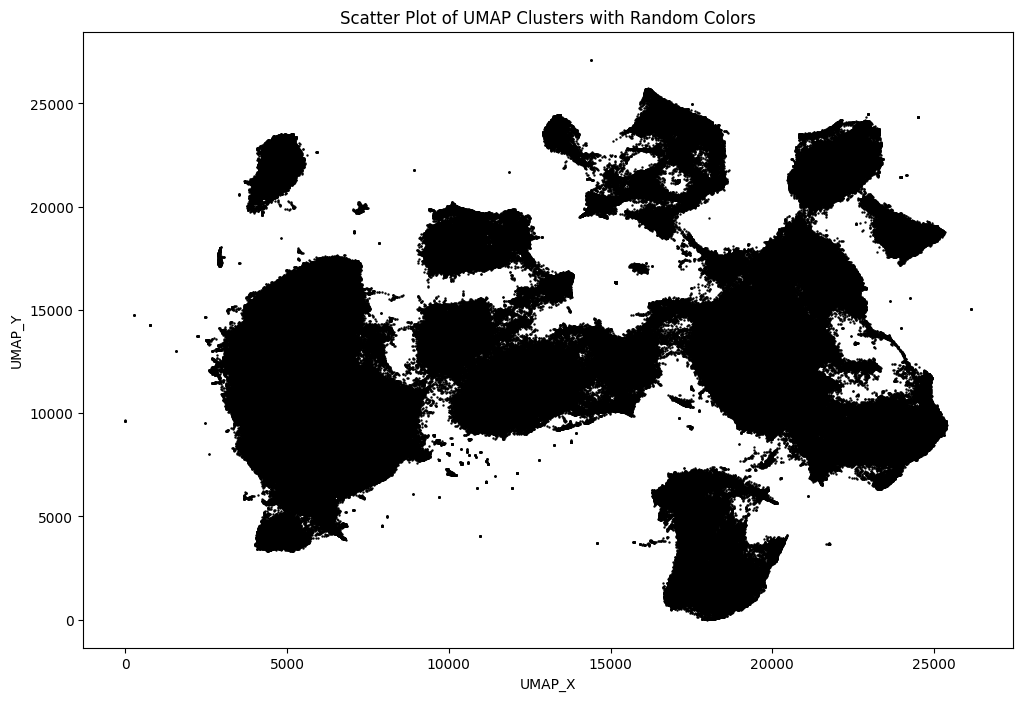

In [6]:
import matplotlib.pyplot as plt

# Set the figure size to be twice as large
plt.figure(figsize=(12, 8))  # Example: Original size was (6, 4), so now it's twice as large

# Plot the scatter plot using the assigned colors, with smaller points
plt.scatter(csv_df['UMAP_X'], csv_df['UMAP_Y'], c='black', s=0.5)  # Set point size to 0.5

# Label the axes and title
plt.xlabel('UMAP_X')
plt.ylabel('UMAP_Y')
plt.title('Scatter Plot of UMAP Clusters with Random Colors')

# Save the figure as a PNG file
plt.savefig('umap_clusters_no_color.png', format='png', dpi=300)  # High resolution PNG

# Show the plot
plt.show()

In [7]:
csv_df.shape

(933253, 41)

In [8]:
ome = from_tiff('/Volumes/Simon/Greg/WD-76845-097.ome.tif')


In [9]:
len(ome.images[0].pixels.channels)

40

In [11]:
csv_df.unique()


















































[-1, 48, 72, 40, 43, ..., 42, 15, 35, 22, 34]
Length: 79
Categories (79, int64): [-1, 0, 1, 2, ..., 74, 75, 76, 77]